<a href="https://colab.research.google.com/github/XelltheThird/CarRacing/blob/master/HW5_ML_AdaBoost_Florian_Kavish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ML HW 5 - AdaBoost - Florian Schmalzl & Kavish Bhatia 

In [0]:
df = np.loadtxt('MachineLearning/AdaBoost/dataCircle.txt')

In [0]:
label_one = df[[np.arange(40)],:]
label_zero = df[[np.arange(40,len(df))], :]

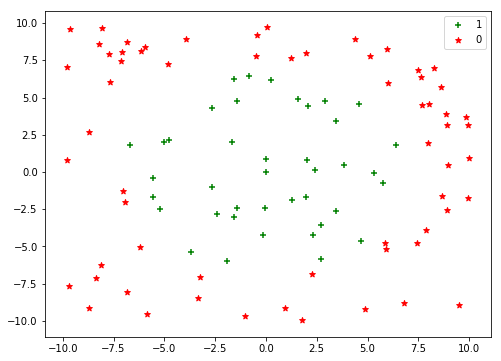

In [0]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(label_one.T[0],label_one.T[1], c='green', marker='+',  label = '1' )

plt.scatter(label_zero.T[0], label_zero.T[1], c='red', marker='*', label = '0')

plt.legend()
plt.show()

In [0]:
X = df.T[:-1]
X = X.T
y = df.T[2:]
y = np.reshape(y, (102))

In [0]:
def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    elif hasattr(classifier, "predict_proba"):
        zz = np.array( [classifier.predict_proba(np.array([xi,yi]).reshape(1,-1))[:,1] for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
    else :
        zz = np.array( [classifier(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
            
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    cm_bright = ListedColormap(['#000000', '#0000FF'])
    
    #Get current axis and plot
    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, 2, cmap='RdBu', alpha=.5)
    ax.contour(xx, yy, Z,  2, cmap='RdBu')
    ax.scatter(X[:,0],X[:,1], c = y, cmap = cm_bright, s = scatter_weights * 40)
    ax.set_xlabel('$X_1$')
    ax.set_ylabel('$X_2$')

In [0]:
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=7,learning_rate=1.0)

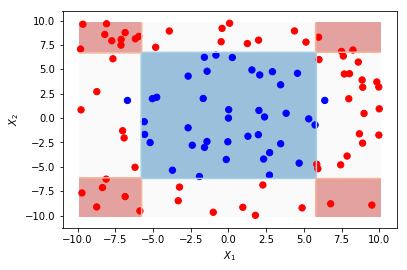

0.9803921568627451

In [0]:
boost.fit(X,y)
plot_decision_boundary(boost, X,y, N = 100)
plt.show()

boost.score(X,y)